# Outliers

Outliers are data points that differ significantly from other observations in a dataset. They may indicate variability in measurement, experimental errors, or novel phenomena. Outliers can affect statistical analyses and may need to be investigated or treated depending on the context.

In [28]:
import numpy as np 
li=[np.random.randint(1,100) for i in range(100)]
from scipy import stats
mean=np.mean(li)
median=np.median(li)
mode=stats.mode(li)
std_dav=np.std(li) # finding standard deviation 
variance = np.var(li) # finding the variance

# mean is affected by the outlier

How to find the outliers

###--using z score and IQR and percentile--

###--Capping is the good way to deal outlier when you can't delete the data--

## Outlier removal using zscore

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 


In [2]:
df=pd.read_csv("dataset/scholarship.csv")
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [4]:
df1=df.copy()
df1.shape


(1000, 3)

<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

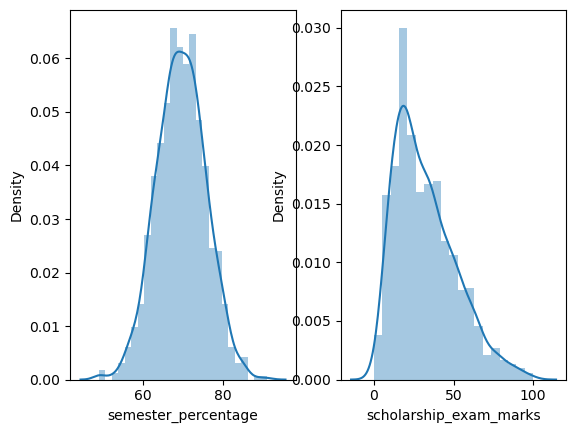

In [8]:
import warnings

warnings.filterwarnings('ignore')

plt.subplot(1,2,1)
sns.distplot(df["semester_percentage"])
plt.subplot(1,2,2)
sns.distplot(df["scholarship_exam_marks"])


In [9]:
mean= df1.semester_percentage.mean()
std=df1.semester_percentage.std()

In [10]:
print(f"The mean is {mean} and the standard deviation is {std}")

The mean is 69.6124 and the standard deviation is 6.158978751323897


In [11]:
highest_allowed = mean+3*std
lowest_allowed= mean-3*std

In [12]:
highest_allowed,lowest_allowed

(88.08933625397168, 51.13546374602831)

## **Trimming method**

In [24]:
df1_without_outlier=df1[(df1["semester_percentage"]<highest_allowed) & (df1["semester_percentage"]>lowest_allowed)]

In [25]:
df1_without_outlier.shape

(995, 3)

## **Z-score**

In [26]:
df["z_score"]=(df["semester_percentage"]-df["semester_percentage"].mean())/df["semester_percentage"].std()

In [27]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
998,86.2,46,1,2.693239


In [30]:
df[(df["z_score"]<-3) | (df["z_score"]>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [31]:
df_without_outlier=df[(df["z_score"]>-3) & (df["z_score"]<3)]

In [32]:
df_without_outlier.shape

(995, 4)

# **Capping**

In [33]:
highest_allowed = mean+3*std
lowest_allowed= mean-3*std

In [34]:
df_capping=pd.read_csv("dataset/scholarship.csv")

df_capping.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [38]:
df_capping["semester_percentage"] = np.where(
    df_capping["semester_percentage"] > highest_allowed, highest_allowed,
    np.where(
        df_capping["semester_percentage"] < lowest_allowed, lowest_allowed,
        df_capping["semester_percentage"]
    )
)


In [39]:
df_capping.shape

(1000, 3)

In [41]:
df_capping[(df_capping["semester_percentage"]>highest_allowed) | (df_capping["semester_percentage"]<lowest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship


In [42]:
# our shape is same but replaced teh outliers with the values of upper or lower limit


# **Outliers detection using the IQR**

only done when the distribution is skewed 

In [43]:
df=pd.read_csv("dataset/scholarship.csv")
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

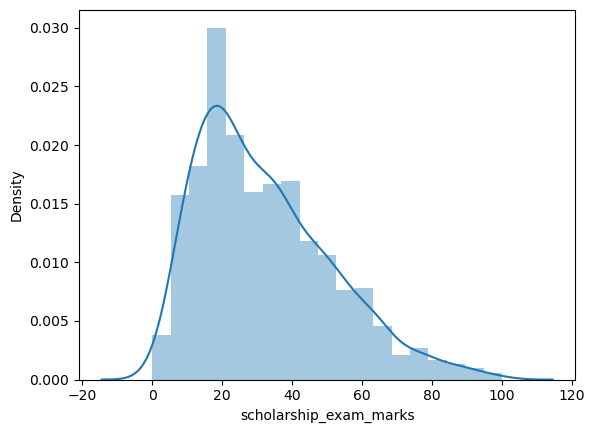

In [44]:
sns.distplot(df["scholarship_exam_marks"])

<Axes: >

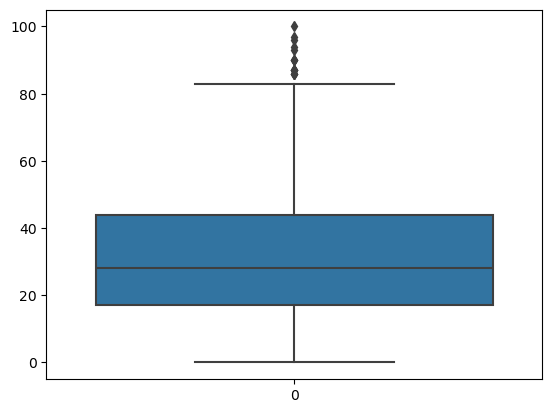

In [45]:
sns.boxplot(df["scholarship_exam_marks"])

In [50]:
Q1=df["scholarship_exam_marks"].quantile(0.25)
Q3=df["scholarship_exam_marks"].quantile(0.75)

IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

Now similarly we can perform the trimming and the capping based on the lower_bound and upper_bound

# percentile is used when getting the normal distribution curve

In [51]:
# for finding the low and max use the same method 

df=pd.read_csv("dataset/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


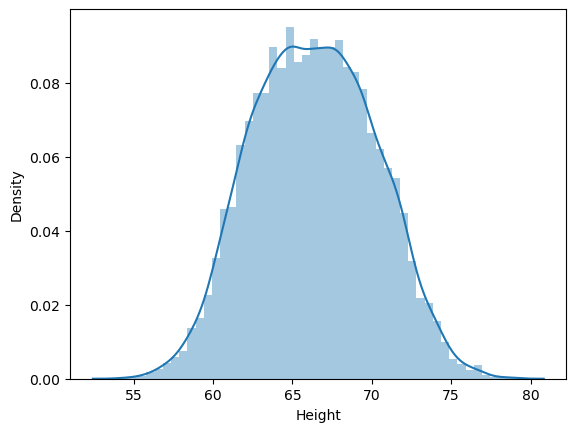

In [55]:
sns.distplot(df["Height"])
plt.show()

In [56]:
min=df["Height"].quantile(0.01)
max=df["Height"].quantile(0.99)

In [57]:
min,max

(58.13441158671655, 74.7857900583366)

In [60]:
df[(df["Height"]<min)|(df["Height"]>max)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [61]:
df.shape

(10000, 3)

In [62]:
# we can see the 200 values are in the outliers so we can't use triimming we can use capping to save our data
